In [1]:
import numpy as np
import pandas as pd

In [68]:
df = pd.read_csv('Salaries.csv')

In [11]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


Use the .info() method to find out how many entries there are.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


What is the average BasePay?

In [18]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [22]:
np.mean(df['BasePay'])
df['BasePay'].mean()

66325.4488404877

What is the highest amount of OvertimePay in the dataset ?

In [23]:
df['OvertimePay'].max()

245131.88

What is the job title of JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll).

In [29]:
sum(df.EmployeeName == 'JOSEPH DRISCOLL')
cond = df.EmployeeName == 'JOSEPH DRISCOLL'
df[cond].JobTitle

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

How much does JOSEPH DRISCOLL make (including benefits)?

In [30]:
df[cond].TotalPayBenefits

24    270324.91
Name: TotalPayBenefits, dtype: float64

What is the name of highest paid person (including benefits)?

In [35]:
df[df.TotalPayBenefits == df.TotalPayBenefits.max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?

In [38]:
df[df.TotalPayBenefits == df.TotalPayBenefits.min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


What was the average (mean) BasePay of all employees per year? (2011-2014)?

In [70]:
for y in df.Year.unique():
  print(f"{y}: {df[df.Year == y].BasePay.mean()}")

2011: 63595.95651677314
2012: 65436.40685742263
2013: 69630.03021648065
2014: 66564.42192449959


How many unique job titles are there?

In [75]:
len(df.JobTitle.unique())

2159

What are the top 5 most common jobs?

In [79]:
df.JobTitle.value_counts().iloc[:5]

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?)

In [89]:
sum(df[df.Year == 2013].JobTitle.value_counts() == 1)

202

How many people have the word Chief in their job title? (This is pretty tricky)

In [115]:
sum(df.JobTitle.apply(lambda s: 'Chief' in s))


423

Is there a correlation between length of the Job Title string and Salary?

In [121]:
df['JobTitleLength'] = df.JobTitle.apply(lambda s: len(s))
df[['JobTitleLength','TotalPayBenefits']].corr()

,JobTitleLength,TotalPayBenefits
JobTitleLength,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


Generate a histogram plot of base salary with 30 bins?

<Axes: >

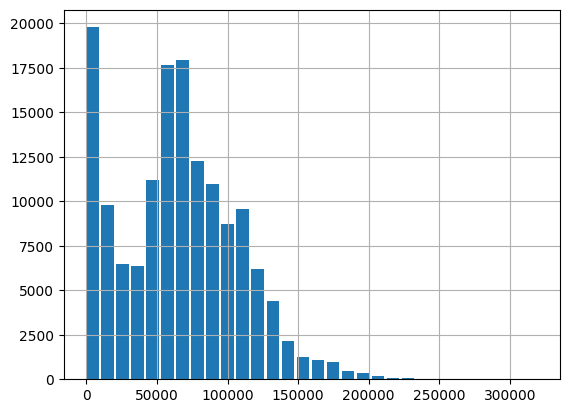

In [128]:
df.BasePay.hist(bins=30, width = 9000)